In [113]:
import pandas as pd
from IPython.display import display

# Reading the specific sheets selected from the excel document
sheets_to_read = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']
dfs = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name=sheets_to_read, header=8)

# Renaming the columns for each dataframe
df_en = dfs['Engelska']
df_en.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]

df_ma = dfs['Matematik']
df_ma.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]

df_sv = dfs['Svenska']
df_sv.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]

df_sva = dfs['Svenska som andraspråk']
df_sva.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]

# Printing out the dataframes for verification
for sheet_name, df in dfs.items():
    print(f"\nData from {sheet_name}:")
    display(df.head())



Data from Engelska:


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2



Data from Matematik:


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7



Data from Svenska:


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
1,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
2,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
3,Riket,Skolverket,40,19,21,100.0,100.0,100.0,15.0,15.9,14.2



Data from Svenska som andraspråk:


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
3,Riket,Skolverket,..,..,..,..,..,..,..,..,..


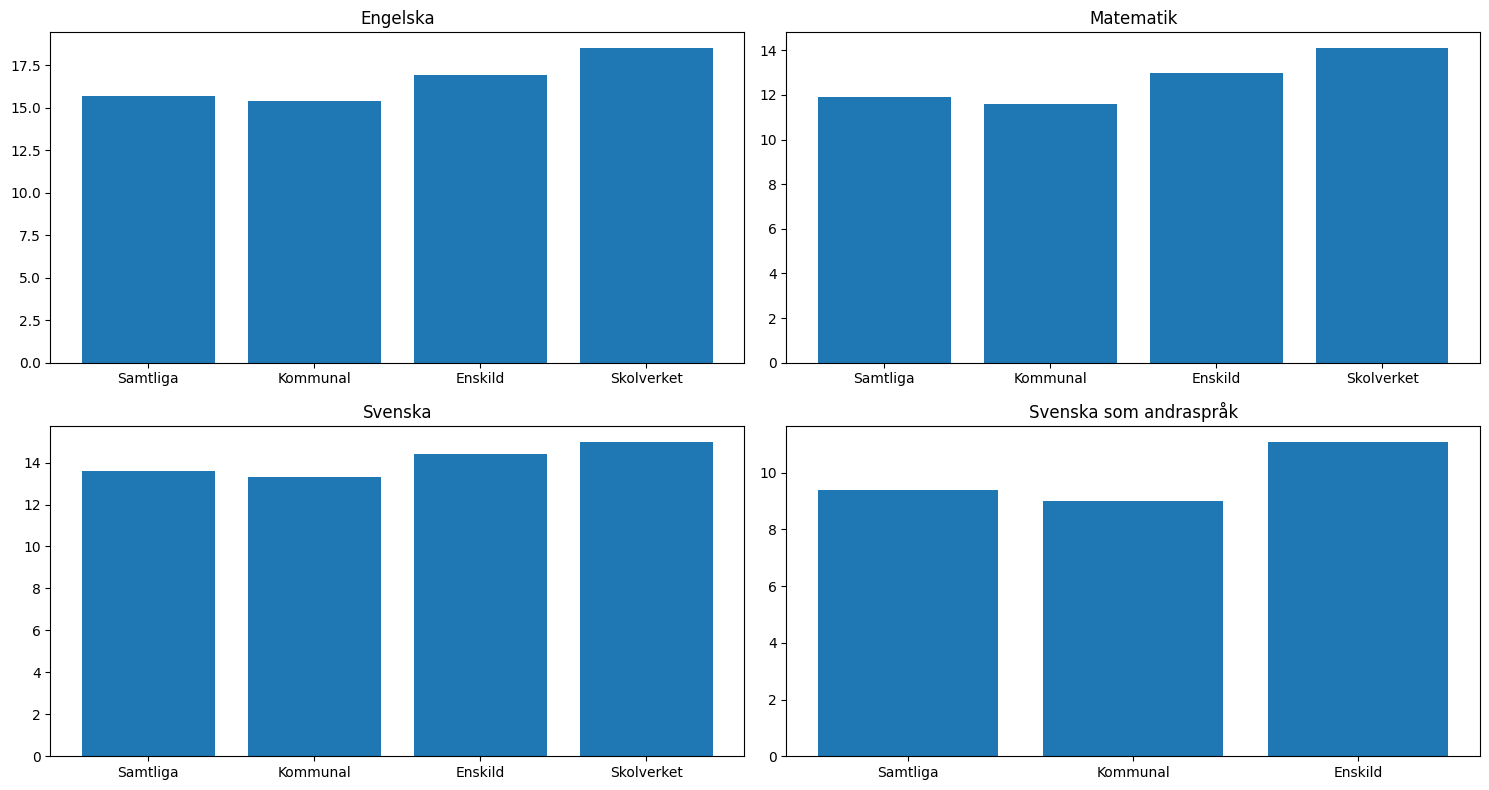

In [114]:
import matplotlib.pyplot as plt
import os

# Replacing ".." with NaN values
df_sva = df_sva.replace("..", pd.NA)

# Removing NaN values from the "Totalt (poäng)" column
df_en = df_en.dropna(subset=["Totalt (poäng)"])
df_ma = df_ma.dropna(subset=["Totalt (poäng)"])
df_sv = df_sv.dropna(subset=["Totalt (poäng)"])
df_sva = df_sva.dropna(subset=["Totalt (poäng)"])

# Creating the subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()

axes[0].bar(df_en["Huvudman"], df_en["Totalt (poäng)"])
axes[0].set_title("Engelska", fontsize=12)

axes[1].bar(df_ma["Huvudman"], df_ma["Totalt (poäng)"])
axes[1].set_title("Matematik", fontsize=12)

axes[2].bar(df_sv["Huvudman"], df_sv["Totalt (poäng)"])
axes[2].set_title("Svenska", fontsize=12)

axes[3].bar(df_sva["Huvudman"], df_sva["Totalt (poäng)"])
axes[3].set_title("Svenska som andraspråk", fontsize=12)

plt.tight_layout()

# Creating a visuals folder
save_folder = "visualiseringar"
os.makedirs(save_folder, exist_ok=True)

# Saving the subplots as png in the folder
file_name = "subplots_huvudman_scores"
save_path = os.path.join(save_folder, file_name)
plt.savefig(save_path)


In [115]:
import pandas as pd
import plotly.express as px

# Reading the specific sheets selected from the excel document
sheet_to_read = 'Tabell 1B'
df = pd.read_excel('data/betyg_o_prov_riksnivå.xlsx', sheet_name=sheet_to_read, header=7)

# Renaming the unnamed cloumn to a accurate name
df = df.rename(columns={'Unnamed: 0': 'Läsår'})

# Filtering out the data that we want in our diagram
df_filtered_failed = df.head(5)[['Läsår', 'Totalt.2', 'Flickor.2', 'Pojkar.2']]

# Creating the diagram
fig = px.line(df_filtered_failed, 
              x='Läsår', 
              y=["Totalt.2", "Flickor.2", "Pojkar.2"], 
              markers=True,
              title="Andel elever utan godkänt betyg i ett, flera eller alla ämnen",
              labels={"value": "Andel (%)", "variable": "Grupp"},
              hover_name='Läsår')

# Save the diagram as an html file
fig.write_html("visualiseringar/andel_underkanda_diagram.html")

fig.show()

In [116]:
# Filtering out the data that we want in our diagram
df_filtered_merit = df.head(5)[['Läsår', 'Totalt', 'Flickor', 'Pojkar']]

# Creating the diagram
fig = px.line(df_filtered_merit, 
              x='Läsår', 
              y=["Totalt", "Flickor", "Pojkar"], 
              markers=True,
              title="Meritvärde för 16 ämnen (2018–2023)",
              labels={"value": "Meritvärde", "variable": "Grupp"},
              hover_name='Läsår')

# Save the diagram as an html file
fig.write_html("visualiseringar/meritvarde_16_amnen.html")

fig.show()